In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Data/lending_club_loan_two.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

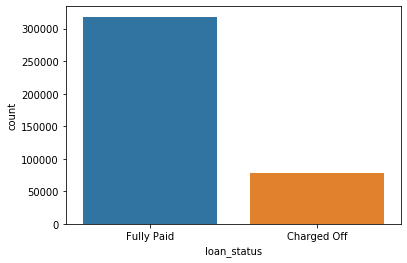

In [4]:
sns.countplot(x='loan_status',data=df);

In [5]:
df['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [6]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [7]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [8]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [9]:
100* df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [10]:
df['emp_title'].nunique()

173105

In [11]:
df['emp_title'].value_counts()

Teacher                                 4389
Manager                                 4250
Registered Nurse                        1856
RN                                      1846
Supervisor                              1830
                                        ... 
CPA-Consultant                             1
Yardman                                    1
target corp.                               1
Military Technician                        1
Manager of Remote Statement Services       1
Name: emp_title, Length: 173105, dtype: int64

In [12]:
df = df.drop('emp_title',axis=1)

In [13]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [14]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

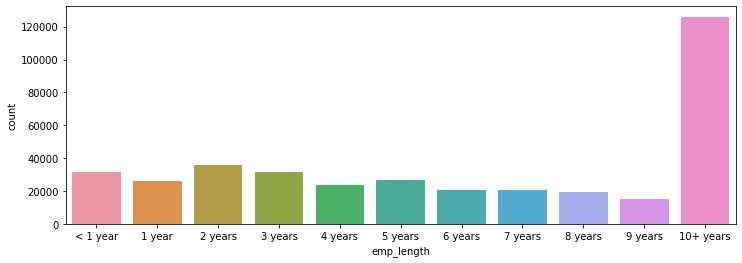

In [15]:
plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',data=df,order=emp_length_order)

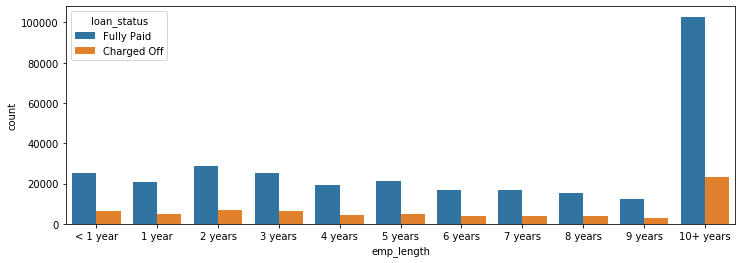

In [16]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status');

In [17]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']

In [18]:
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

In [19]:
emp_len = emp_co/emp_fp

In [20]:
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

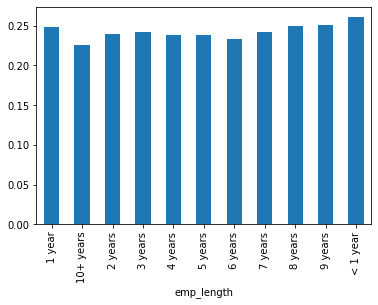

In [21]:
emp_len.plot(kind='bar');

In [22]:
df = df.drop('emp_length',axis=1)

In [23]:
df = df.drop('title',axis=1)

In [24]:
print("Correlation with the mort_acc column")
df.corr()['mort_acc'].sort_values(ascending=False)

Correlation with the mort_acc column


mort_acc                1.000000
total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
loan_repaid             0.073111
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
Name: mort_acc, dtype: float64

In [25]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [26]:
total_acc_avg[2.0]

0.0

In [27]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [28]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [29]:
df = df.dropna()

In [30]:
print (df.isnull().values.any())

False


In [31]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [32]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [33]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [34]:
df = df.drop('grade',axis=1)

In [35]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [36]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [37]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [38]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [39]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [40]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [41]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [42]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [43]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [44]:
df = df.drop('issue_d',axis=1)

In [45]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [46]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [47]:
df = df.drop('loan_status',axis=1)

In [48]:
print (df.isnull().values.any())

False


In [49]:
df.select_dtypes(['object']).columns

Index([], dtype='object')

## Train Test Split

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

## Normalizing the Data

In [53]:
from sklearn.preprocessing import RobustScaler

In [54]:
scaler = RobustScaler() 
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
full_scaler = RobustScaler() 
full_scaler.fit(X)
X = scaler.transform(X)

In [56]:
from sklearn.metrics import classification_report,confusion_matrix

In [57]:
X.shape

(395219, 78)

## Cross Validation if data < 100 k

In [108]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [109]:
from sklearn.model_selection import cross_val_score

In [110]:
logmodel = LogisticRegression()
lr_scores = cross_val_score(logmodel, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (lr_scores.mean(), lr_scores.std() * 2))

Z:\ProgramData\Anaconda3\envs\data_science\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Z:\ProgramData\Anaconda3\envs\data_science\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

Accuracy: 0.89 (+/- 0.00)


Z:\ProgramData\Anaconda3\envs\data_science\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
Ks = 40
error_rate = []
mean_acc = np.zeros((Ks-1))

# Will take some time
for i in range(1,Ks):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    #error_rate.append(np.mean(pred_i != y_test))
    mean_acc[i-1] = accuracy_score(y_test, pred_i)

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [ ]:
knn = KNeighborsClassifier(n_neighbors=mean_acc.argmax()+1)
knn_scores = cross_val_score(knn, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (knn_scores.mean(), knn_scores.std() * 2))

In [ ]:
rfc_cvs = RandomForestClassifier(n_estimators=600)
rfc_scores = cross_val_score(rfc_cvs, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (rfc_scores.mean(), rfc_scores.std() * 2))

In [ ]:
clf_cvs = svm.SVC(kernel='linear', C=1)
clf_scores = cross_val_score(clf_cvs, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (clf_scores.mean(), clf_scores.std() * 2))

## Cross Validation if data >= 100 k

In [58]:
from sklearn.linear_model import SGDClassifier

In [59]:
from sklearn.model_selection import cross_val_score

In [60]:
sgd_clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)

In [61]:
sgd_scores = cross_val_score(sgd_clf, X, y, cv=5,verbose=1)
print("Accuracy: %0.2f (+/- %0.2f)" % (sgd_scores.mean(), sgd_scores.std() * 2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Z:\ProgramData\Anaconda3\envs\data_science\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:554: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
Z:\ProgramData\Anaconda3\envs\data_science\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:554: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
Z:\ProgramData\Anaconda3\envs\data_science\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:554: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
Z:\ProgramData\Anaconda3\

Accuracy: 0.88 (+/- 0.04)


Z:\ProgramData\Anaconda3\envs\data_science\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:554: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.2s finished


 ### Kernel Approximation

In [91]:
from sklearn.kernel_approximation import RBFSampler

In [92]:
rbf_feature = RBFSampler(gamma=1, random_state=1)

In [93]:
X_features = rbf_feature.fit_transform(X)

In [94]:
sgd_clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)

In [95]:
sgd_scores = cross_val_score(sgd_clf, X, y, cv=5,verbose=1)
print("Accuracy: %0.2f (+/- %0.2f)" % (sgd_scores.mean(), sgd_scores.std() * 2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Z:\ProgramData\Anaconda3\envs\data_science\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:554: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
Z:\ProgramData\Anaconda3\envs\data_science\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:554: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
Z:\ProgramData\Anaconda3\envs\data_science\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:554: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
Z:\ProgramData\Anaconda3\

Accuracy: 0.86 (+/- 0.05)


Z:\ProgramData\Anaconda3\envs\data_science\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:554: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.2s finished


## Creating a Model with Scikit

In [62]:
from sklearn.model_selection import GridSearchCV

## Scikit Model If data < 100 k

In [ ]:
rbf_param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
linear_param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['linear']}

In [ ]:
rbf_grid = GridSearchCV(svm.SVC(),rbf_param_grid,refit=True,verbose=3)

In [ ]:
rbf_grid.fit(X_train,y_train)

In [ ]:
rbf_grid.best_params_

In [ ]:
rbf_grid.best_estimator_

In [ ]:
rbf_grid_predictions = rbf_grid.predict(X_test)

In [ ]:
print (classification_report(y_test, rbf_grid_predictions))
print('\n')
print (confusion_matrix(y_test, rbf_grid_predictions))

In [ ]:
linear_grid = GridSearchCV(svm.SVC(),linear_param_grid,refit=True,verbose=3)

In [ ]:
linear_grid.fit(X_train,y_train)

In [ ]:
linear_grid.best_params_

In [ ]:
linear_grid.best_estimator_

In [ ]:
linear_grid_predictions = linear_grid.predict(X_test)

In [ ]:
print (classification_report(y_test, linear_grid_predictions))
print('\n')
print (confusion_matrix(y_test, linear_grid_predictions))

## Scikit Model If data >= 100 k

In [70]:
tuned_parameters = {
    'loss': ['hinge','log'],
    'penalty': ['elasticnet'],
    'alpha': [0.0001,0.001, 0.01, 0.1, 1, 10],
    'max_iter':[1000],
    'l1_ratio': [0, 0.05, 0.1,0.15, 0.2, 0.5, 0.8, 0.9, 0.95, 1]
}

In [71]:
sgd_clf = SGDClassifier()
sgd_grid_model = GridSearchCV(sgd_clf, tuned_parameters, scoring = 'accuracy', cv=2)

In [72]:
sgd_grid_model.fit(X_train, y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'l1_ratio': [0, 0.05, 0.1, 0.15, 0.2, 0.5, 0.8, 0.9,
                                      0.95, 1],
              

In [73]:
sgd_grid_model.best_params_

{'alpha': 0.001,
 'l1_ratio': 0.1,
 'loss': 'log',
 'max_iter': 1000,
 'penalty': 'elasticnet'}

In [74]:
sgd_grid_model.best_estimator_

SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.1, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='elasticnet',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [75]:
sgd_grid_model_predictions = sgd_grid_model.predict(X_test)

In [76]:
print (classification_report(y_test, sgd_grid_model_predictions))
print('\n')
print (confusion_matrix(y_test, sgd_grid_model_predictions))

              precision    recall  f1-score   support

           0       0.95      0.46      0.62     15658
           1       0.88      0.99      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.73      0.78     79044
weighted avg       0.89      0.89      0.87     79044



[[ 7152  8506]
 [  379 63007]]


In [96]:
rbf_feature = RBFSampler(gamma=1, random_state=1)

In [97]:
X_features = rbf_feature.fit_transform(X_train)

In [98]:
sgd_clf = SGDClassifier()
sgd_grid_model = GridSearchCV(sgd_clf, tuned_parameters, scoring = 'accuracy', cv=2)

In [99]:
sgd_grid_model.fit(X_features , y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'l1_ratio': [0, 0.05, 0.1, 0.15, 0.2, 0.5, 0.8, 0.9,
                                      0.95, 1],
              

In [100]:
sgd_grid_model.best_params_

{'alpha': 0.0001,
 'l1_ratio': 0,
 'loss': 'hinge',
 'max_iter': 1000,
 'penalty': 'elasticnet'}

In [101]:
sgd_grid_model.best_estimator_

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0, learning_rate='optimal', loss='hinge', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='elasticnet',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [104]:
sgd_grid_model_predictions = sgd_grid_model.predict(rbf_feature.transform(X_test))

In [105]:
print (classification_report(y_test, sgd_grid_model_predictions))
print('\n')
print (confusion_matrix(y_test, sgd_grid_model_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     15658
           1       0.80      1.00      0.89     63386

    accuracy                           0.80     79044
   macro avg       0.40      0.50      0.45     79044
weighted avg       0.64      0.80      0.71     79044



[[    0 15658]
 [    0 63386]]


Z:\ProgramData\Anaconda3\envs\data_science\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Predicting on a new Customer

In [84]:
import random
random.seed(101)
random_ind = random.randint(0,len(X_test))

new_customer = X_test[random_ind]

In [85]:
X_test.shape

(79044, 78)

In [86]:
new_customer = new_customer.reshape(-1, 78)

In [88]:
sgd_grid_model.predict(new_customer)

array([1], dtype=int64)

In [89]:
y_test[random_ind]

1

## Creating a Model with TensorFlow

In [106]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [107]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw


# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [108]:
from tensorflow.keras.callbacks import EarlyStopping

In [109]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [110]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
9881/9881 [==============================] - 21s 2ms/step - loss: 0.2828 - val_loss: 0.2597
Epoch 2/600
9881/9881 [==============================] - 14s 1ms/step - loss: 0.2601 - val_loss: 0.2600
Epoch 3/600
9881/9881 [==============================] - 14s 1ms/step - loss: 0.2588 - val_loss: 0.2594
Epoch 4/600
9881/9881 [==============================] - 14s 1ms/step - loss: 0.2583 - val_loss: 0.2603
Epoch 5/600
9881/9881 [==============================] - 16s 2ms/step - loss: 0.2579 - val_loss: 0.2587
Epoch 6/600
9881/9881 [==============================] - 21s 2ms/step - loss: 0.2575 - val_loss: 0.2587
Epoch 7/600
9881/9881 [==============================] - 23s 2ms/step - loss: 0.2569 - val_loss: 0.2585
Epoch 8/600
9881/9881 [==============================] - 16s 2ms/step - loss: 0.2570 - val_loss: 0.2577
Epoch 9/600
9881/9881 [==============================] - 14s 1ms/step - loss: 0.2563 - val_loss: 0.2578
Epoch 10/600
9881/9881 [==============================] - 15s 1m

## Evaluating Model Performance.

In [111]:
losses = pd.DataFrame(model.history.history)

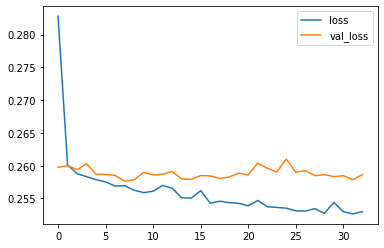

In [112]:
losses[['loss','val_loss']].plot()

In [113]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [114]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



## Predicting on new Customer

In [75]:
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [76]:
model.predict_classes(new_customer.values.reshape(1,78))

array([[1]])

In [77]:
df.iloc[random_ind]['loan_repaid']

1.0